In [18]:
%matplotlib inline
# %matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from IPython import display

import numpy as np
import pandas as pd
import os
import re

In [126]:
# Make data.
posX = [i for i in range(50, 0, -5)]
posY = [i for i in range(100, 0, -10)]

X = np.arange(50, 0, -5)
Y = np.arange(100, 0, -10)
X, Y = np.meshgrid(X, Y)

Z = np.full(X.shape, 162.0/165/165)#np.nan)
print(Z.shape)
print(Z)

(10, 10)
[[0.00595041 0.00595041 0.00595041 0.00595041 0.00595041 0.00595041
  0.00595041 0.00595041 0.00595041 0.00595041]
 [0.00595041 0.00595041 0.00595041 0.00595041 0.00595041 0.00595041
  0.00595041 0.00595041 0.00595041 0.00595041]
 [0.00595041 0.00595041 0.00595041 0.00595041 0.00595041 0.00595041
  0.00595041 0.00595041 0.00595041 0.00595041]
 [0.00595041 0.00595041 0.00595041 0.00595041 0.00595041 0.00595041
  0.00595041 0.00595041 0.00595041 0.00595041]
 [0.00595041 0.00595041 0.00595041 0.00595041 0.00595041 0.00595041
  0.00595041 0.00595041 0.00595041 0.00595041]
 [0.00595041 0.00595041 0.00595041 0.00595041 0.00595041 0.00595041
  0.00595041 0.00595041 0.00595041 0.00595041]
 [0.00595041 0.00595041 0.00595041 0.00595041 0.00595041 0.00595041
  0.00595041 0.00595041 0.00595041 0.00595041]
 [0.00595041 0.00595041 0.00595041 0.00595041 0.00595041 0.00595041
  0.00595041 0.00595041 0.00595041 0.00595041]
 [0.00595041 0.00595041 0.00595041 0.00595041 0.00595041 0.00595041
  0

### Load data

In [127]:
selected = pd.read_csv('./distance/distance_step5_avg.csv')
selected

,Dim,Middle,Code,selected,avg
0,10-5dim,10,5,160.140386,0.005882
1,100-10dim,100,10,153.214406,0.005628
2,100-15dim,100,15,153.031042,0.005621
3,100-20dim,100,20,153.970876,0.005655
4,100-25dim,100,25,157.681874,0.005792
...,...,...,...,...,...
70,90-35dim,90,35,158.136119,0.005808
71,90-40dim,90,40,158.120658,0.005808
72,90-45dim,90,45,157.491929,0.005785
73,90-50dim,90,50,160.502882,0.005895


In [128]:
for i, row in selected.iterrows():
    x = row['Code']
    y = row['Middle']
#     print(x, y)
#     print(type(x), type(y))
    x_idx = posX.index(int(x))
    y_idx = posY.index(int(y))
#     print(x_idx, y_idx)
#     print(row['selected'])
    Z[y_idx, x_idx] = row['avg']

Z

array([[0.0058349 , 0.00579054, 0.00582927, 0.0058124 , 0.00583589,
        0.0057918 , 0.0056555 , 0.00562097, 0.00562771, 0.00534356],
       [0.00589542, 0.00578483, 0.00580792, 0.00580849, 0.00578944,
        0.00563652, 0.00555486, 0.00555188, 0.00533489, 0.00574146],
       [0.0058084 , 0.00580351, 0.00581084, 0.00582979, 0.00579481,
        0.00563221, 0.0055651 , 0.00525334, 0.00517868, 0.00539793],
       [0.005777  , 0.00576737, 0.00580455, 0.00577237, 0.00577346,
        0.00564017, 0.00557123, 0.00557885, 0.00527646, 0.00560542],
       [0.0058125 , 0.00580037, 0.00586971, 0.00580991, 0.00580336,
        0.00556855, 0.00559632, 0.00562097, 0.0053746 , 0.00565587],
       [0.00595041, 0.00575286, 0.00586949, 0.00578558, 0.00578031,
        0.00555445, 0.00569944, 0.00556933, 0.00542747, 0.00566791],
       [0.00595041, 0.00595041, 0.00595041, 0.00581752, 0.00580178,
        0.00581092, 0.00575037, 0.00568109, 0.00547194, 0.00568053],
       [0.00595041, 0.00595041, 0.0059504

In [161]:
Z = Z*1000
Z

# Plot

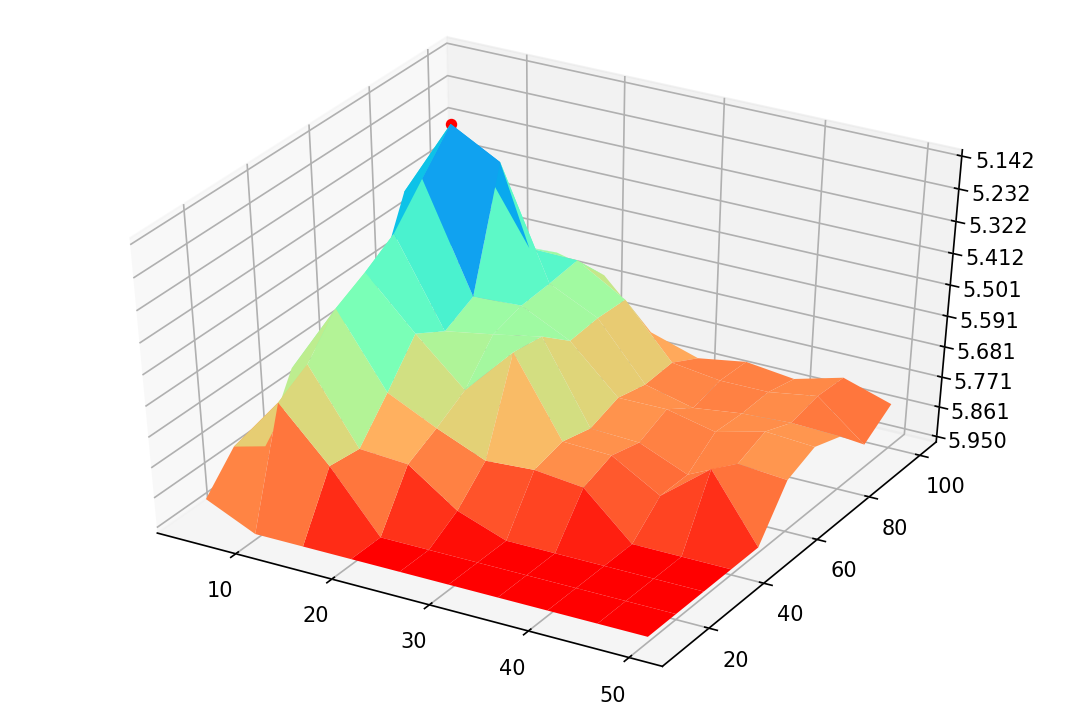

In [174]:
fig = plt.figure(figsize=(9,6), dpi=150)
ax = fig.gca(projection='3d')

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap='rainbow', vmin=(140.0/165/165*1000), vmax=(162.0/165/165*1000))
sc = ax.scatter(10,80,5.179, color='r')

# ax.set_xlabel('Code Layer')
# ax.set_ylabel('Middle Layer')

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.03f'))
# ax.zaxis.set_ticks_position('both')
# ax.set_zticklabels(ax.get_zticks(),rotation=0, va='bottom', ha='center')
# ax.zaxis.set_major_formatter(FormatStrFormatter('%.3e'))
# ax.set_zticks(filter(lambda x: s_min <= x <= s_max, ax.get_zticks()))

# Add a color bar which maps values to colors.
# fig.colorbar(surf, shrink=0.5, aspect=5)

# ax.contourf(X, Y, Z, zdir='z', offset=170, cmap='rainbow', vmin=140, vmax=165)
ax.set_zlim((162/165/165*1000), (140/165/165*1000))
ax.view_init(40, -60)
# ax.view_init(90, 0)

plt.show()

### Split middle & code layer

In [ ]:
# step5 = pd.read_csv('./distance/distance_step5_merge.csv')
# step5

In [ ]:
# middles = []
# codes = []
# for dim in step5['Dim']:
# #     print(dim)
#     middle = dim.split('-')[0]
#     code = re.split('\d+-|dim', dim)[1]
# #     print(middle, code)
#     middles.append(middle)
#     codes.append(code)
    
# step5['Middle'] = middles
# step5['Code'] = codes
# step5

In [ ]:
# step5.to_csv('./distance/distance_step5_layer.csv', index=False)